<a href="https://colab.research.google.com/github/saranshkg/Financial-Analytics-and-AI/blob/main/Beta_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import numpy as np #numerical python
import pandas as pd #python dataframe
import seaborn as sns #for plotting
import matplotlib.pyplot as plt #for plotting
import statsmodels.api as sm #regression function resides here  

In [ ]:
# Read Data
data = pd.read_csv("Beta.csv")
data.head()

# Merrill Lynch is the excess returns over the risk-free rate (Re - rf)
# Market is the excess returns over the risk free rate: Rm - rf

,(yyyymmdd),Merrill Lynch,Market
0,19721229,-0.08,0.18
1,19731231,-0.56,-0.17
2,19741231,-0.12,-0.27
3,19751231,0.37,0.38
4,19761231,0.80,0.26


In [ ]:
y = data["Merrill Lynch"]
x = data["Market"]

In [ ]:
# Doing a regression
x = sm.add_constant(x)
# Those who made Python forgot for add the Constant i.e. Y = mX + C where C is the constant
model = sm.OLS(y,x) # OLS stands for ordinary least square also known as Best Fit Line
results = model.fit() # fit the data on the model
results.params

const    -0.024613
Market    1.987257
dtype: float64

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Merrill Lynch   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     24.19
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           2.93e-05
Time:                        11:49:47   Log-Likelihood:                -13.610
No. Observations:                  32   AIC:                             31.22
Df Residuals:                      30   BIC:                             34.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0246      0.085     -0.289      0.775      -0.199       0.149
Market         1.9873      0.404      4.918      0.000       1.162       2.812
==============================================================================
Omnibus:                       18.513   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.676
Skew:                           1.506   Prob(JB):                     4.38e-06
Kurtosis:                       6.071   Cond. No.                         6.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Prediction based on model
ML_predicted = results.predict(x)
print(ML_predicted)

0     0.333093
1    -0.362447
2    -0.561173
3     0.730544
4     0.492074
5    -0.123976
6     0.114495
7     0.412583
8     0.631182
9    -0.104104
10    0.392711
11    0.432456
12    0.094622
13    0.611309
14    0.313220
15    0.035004
16    0.333093
17    0.571564
18   -0.104104
19    0.591436
20    0.134367
21    0.193985
22   -0.024613
23    0.670927
24    0.392711
25    0.611309
26    0.352966
27    0.174112
28    0.054877
29   -0.183594
30   -0.382320
31    0.551691
dtype: float64


In [ ]:
data['pred'] = ML_predicted
data['error'] = y - ML_predicted
data.head() 

,(yyyymmdd),Merrill Lynch,Market,pred,error
0,19721229,-0.08,0.18,0.333093,-0.413093
1,19731231,-0.56,-0.17,-0.362447,-0.197553
2,19741231,-0.12,-0.27,-0.561173,0.441173
3,19751231,0.37,0.38,0.730544,-0.360544
4,19761231,0.80,0.26,0.492074,0.307926


In [ ]:
# Checking for Normality
# Check the Null Hypothesis: Error is normally distributed
# when p - value < 0.05 reject the null hypothesis
from scipy.stats import shapiro
shapiro(np.abs(data['error']))

ShapiroResult(statistic=0.7635608315467834, pvalue=9.040041732077952e-06)

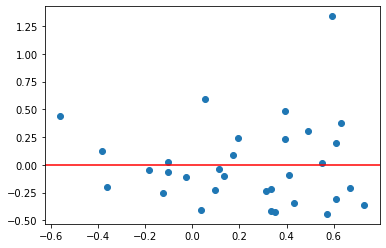

In [ ]:
# Residual Plot
plt.scatter(data['pred'], data['error'])
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()

Beta - 1.98 (Merrill Lynch is very very risky)
No additional alpha
Scatterplot doesn't show linearity
A better model to apply is perhaps not capital asset pricing model


# New Section